In [5]:
import matplotlib.pyplot as plt
import numpy as np
import wavelength_dependent_PSF_grism_sim as PSF_Grism

from grizli.model import GrismFLT
import os

In [6]:
empty_fits_dir = "/Users/keith/astr/research_astr/roman_grism_sim/ultra_smooth_lambda_dependent/fits"
spectrum_file = "/Users/keith/astr/research_astr/FOV0/FOV0_SEDs/ukg0v.dat"
bandpass_file = "/Users/keith/astr/research_astr/FOV0/FOV0_SEDs/wfirst_wfi_f158_001_syn.fits"

empty_direct = os.path.join(empty_fits_dir, "empty_direct.fits")
empty_seg = os.path.join(empty_fits_dir, "empty_seg.fits")

# Consider how to incorporate this later (considering the pad and placeholder variables)
# roman = GrismFLT(direct_file=empty_direct, seg_file=empty_seg, pad=100)

args = PSF_Grism.create_objects_for_disperse_function(empty_fits_dir=empty_fits_dir, 
                                                      spectrum_file=spectrum_file, 
                                                      bandpass_file=bandpass_file,
                                                      detector_position=(2044,2044))

Image cutout: x=slice(0, 4088, None), y=slice(0, 4088, None) [Out of range]
/Users/keith/astr/research_astr/roman_grism_sim/ultra_smooth_lambda_dependent/fits/empty_direct.fits / Pad ref HDU with 2064 pixels
/Users/keith/astr/research_astr/roman_grism_sim/ultra_smooth_lambda_dependent/fits/empty_direct.fits / blot segmentation /Users/keith/astr/research_astr/roman_grism_sim/ultra_smooth_lambda_dependent/fits/empty_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...


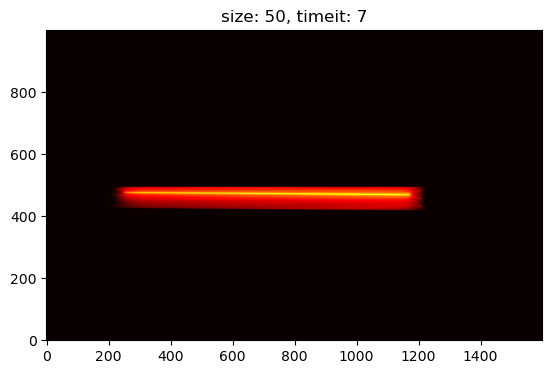

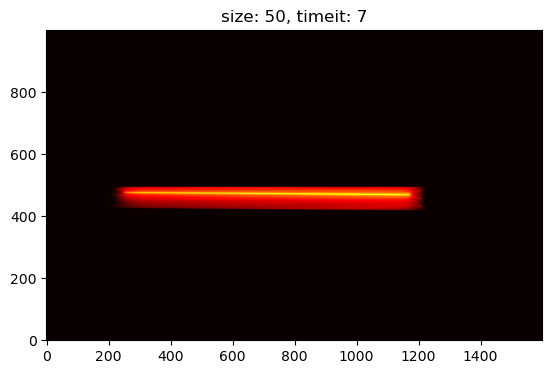

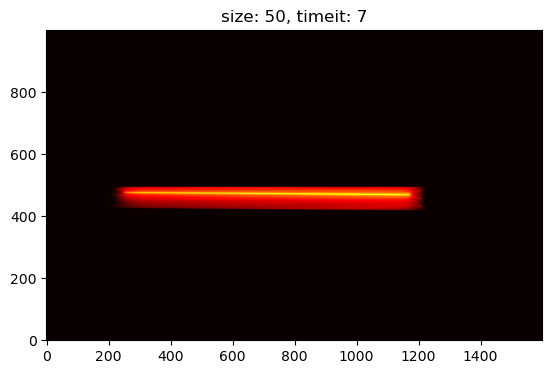

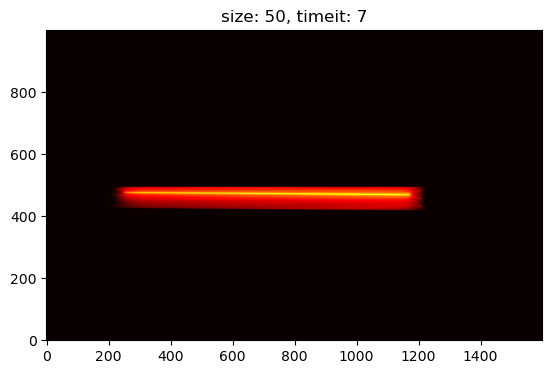

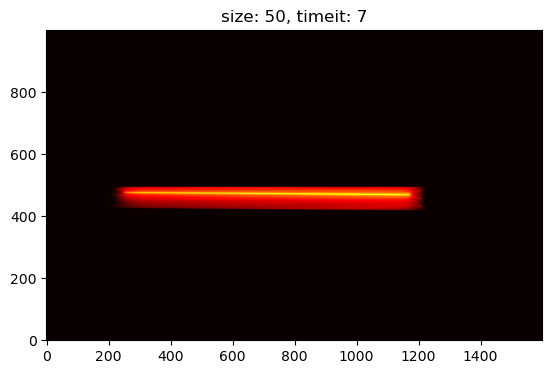

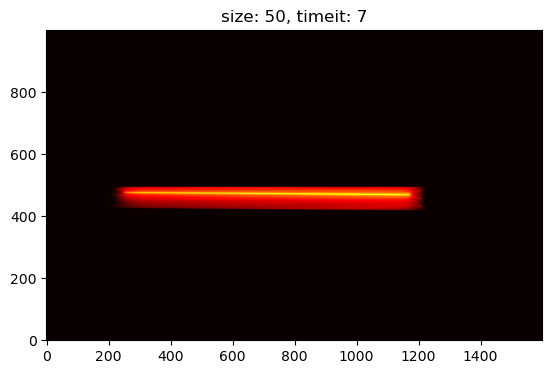

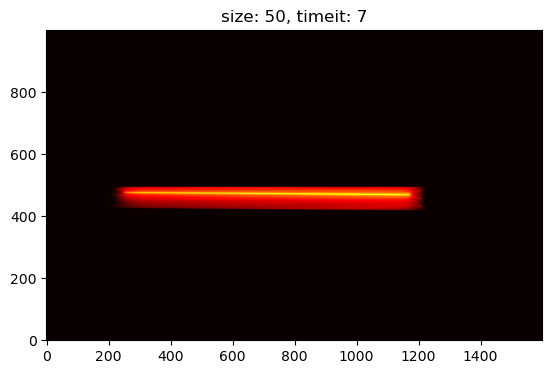

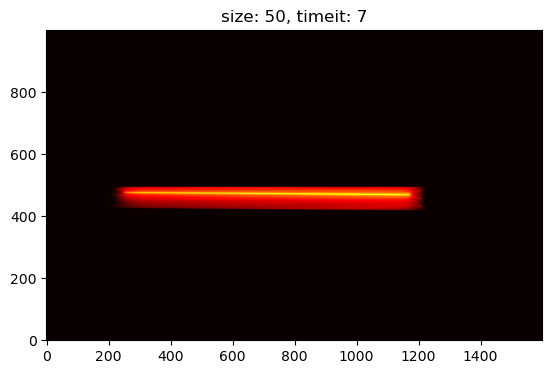

7.79 s ± 187 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
roman_sim_small = PSF_Grism.disperse_one_star(**args, size=50)

plt.imshow(np.log(roman_sim_small.model[2600:3600,2400:4000]+1), origin="lower", cmap="hot", vmin=0, vmax=15)
plt.title("size: 50, timeit: 7")
plt.show()

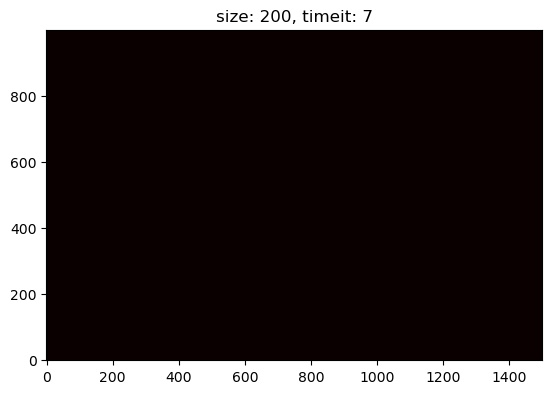

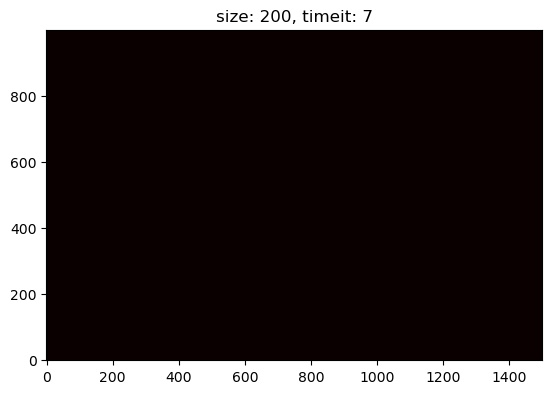

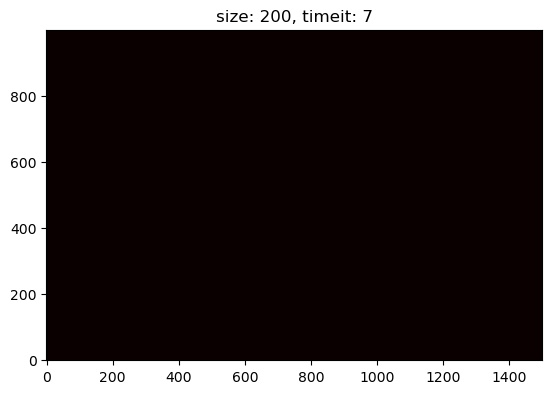

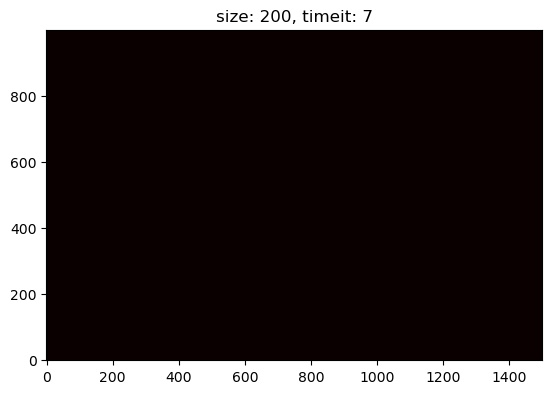

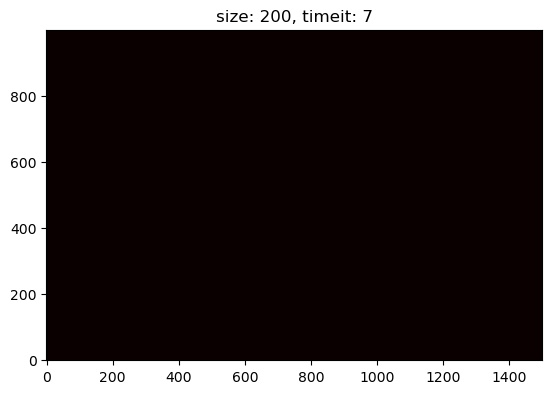

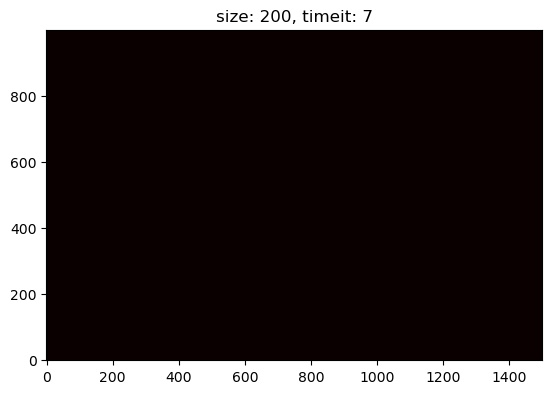

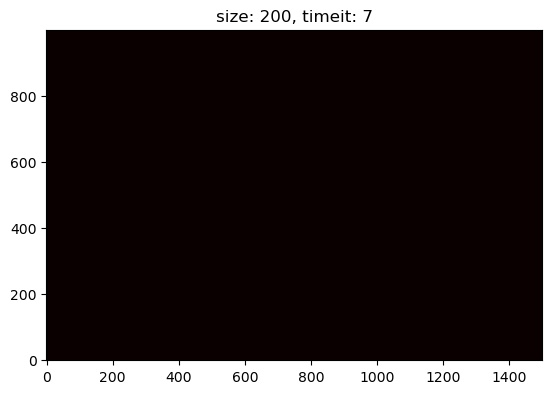

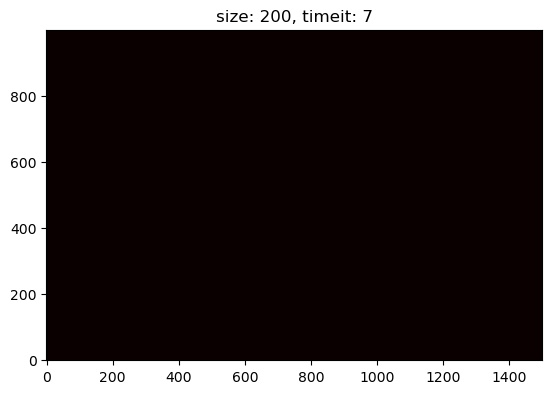

7.73 s ± 36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
roman_sim_large = PSF_Grism.disperse_one_star(**args, size=200)

plt.imshow(np.log(roman_sim_large.model[1700:2700,1500:3000]+1), origin="lower", cmap="hot", vmin=0, vmax=15)
plt.title("size: 200, timeit: 7")
plt.show()

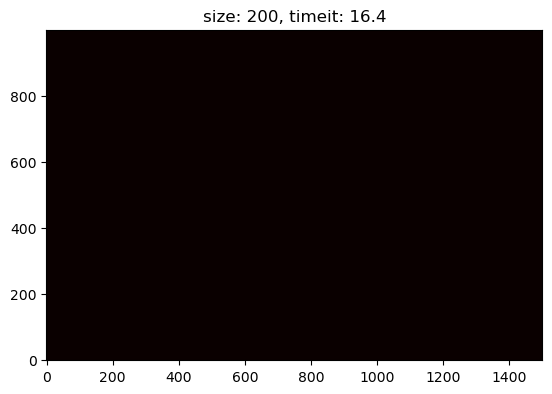

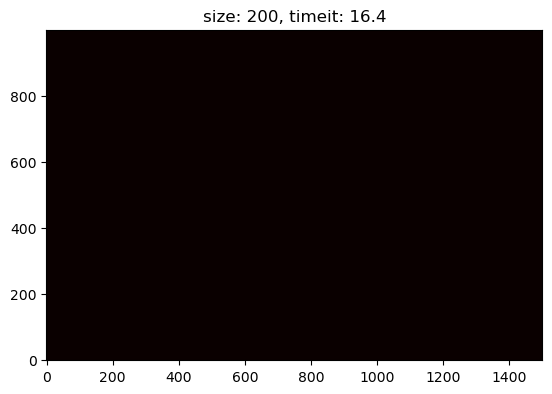

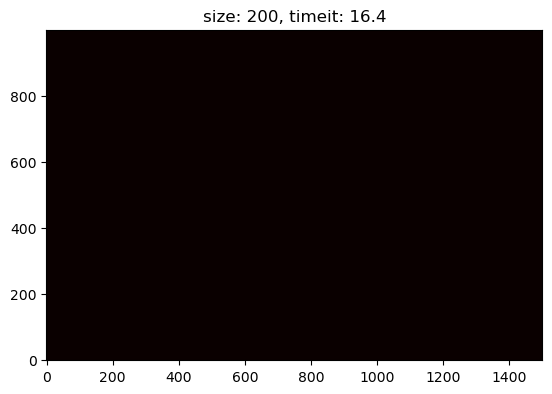

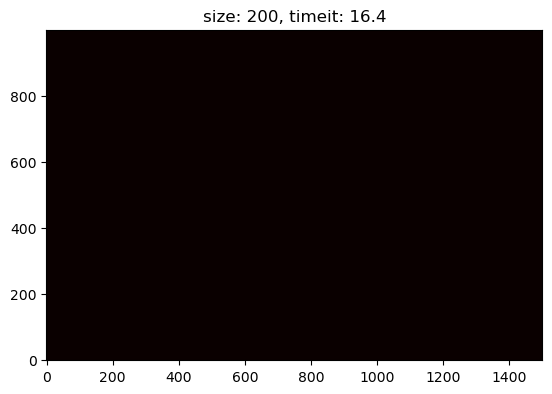

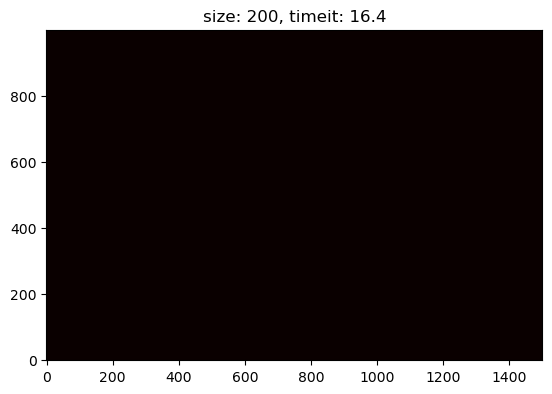

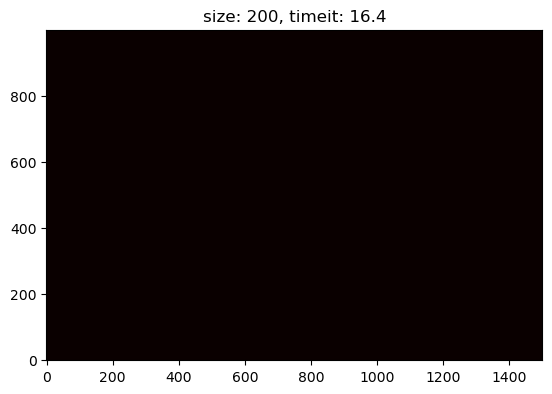

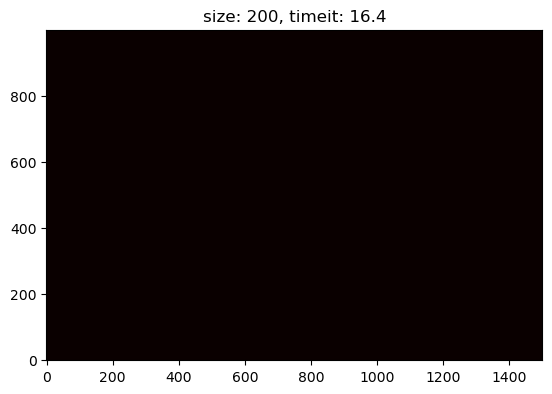

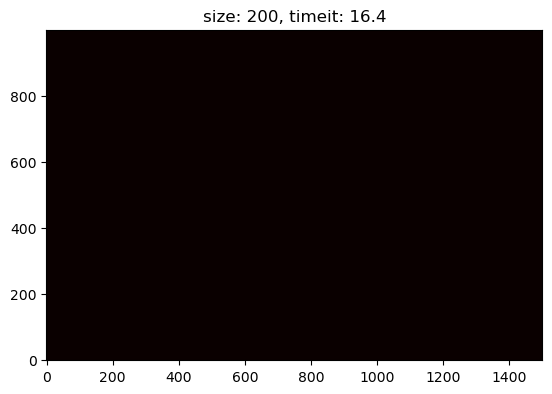

15.2 s ± 167 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
roman_sim_x_large = PSF_Grism.disperse_one_star(**args, size=2000)

plt.imshow(np.log(roman_sim_x_large.model[1700:2700,1500:3000]+1), origin="lower", cmap="hot", vmin=0, vmax=15)
plt.title("size: 200, timeit: 16.4")
plt.show()

In [10]:
# test_full = np.zeros_like(list_of_dispersions[0])
# for ii in range(len(list_of_dispersions)):
#     test_full += list_of_dispersions[ii]
# plt.imshow(test_full, origin='lower', cmap='hot')
# plt.title(f"Min: {test_full.min()}, Max: {test_full.max()}")
# plt.show()

# diff = test_full - roman_sim.model
# plt.imshow(diff, origin="lower", cmap='hot')
# plt.title(f"Min: {diff.min()}, Max: {diff.max()}")
# plt.show()

In [11]:
# for ii in range(len(list_of_dispersions)):
#     plt.imshow(list_of_dispersions[ii][2000:2300, 1250:3000], origin="lower", cmap="hot")
#     plt.title(f"Min: {list_of_dispersions[ii].min()} ; Max: {list_of_dispersions[ii].max()}")
#     plt.show()